# 🧪 A/B Test: Conversion Rate Comparison
This notebook analyzes binary outcome data for a control and variant group to determine whether the new version leads to significantly higher conversion rates.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('../data/ab-binary.csv')
df.head()

,group,converted
0,control,0
1,control,1
2,control,0
3,control,0
4,control,0


In [3]:
# Check conversion rates by group
summary = df.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
summary.columns = ['n', 'conversions', 'conversion_rate']
summary

,n,conversions,conversion_rate
group,,,
control,1000,124,0.124
variant,1000,148,0.148


In [4]:
# Extract values for z-test
control = df[df['group'] == 'control']['converted']
variant = df[df['group'] == 'variant']['converted']

# Conversion rates
p1 = control.mean()
p2 = variant.mean()

# Sample sizes
n1 = control.count()
n2 = variant.count()

# Pooled proportion and standard error
p_pool = (p1 * n1 + p2 * n2) / (n1 + n2)
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# Z-score and p-value (two-tailed)
z_score = (p2 - p1) / se
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Z-Score: {z_score:.4f}, P-Value: {p_value:.4f}")

Z-Score: 1.5656, P-Value: 0.1175


In [7]:
# In this example, P-Value is 0.1175, which is far too large to 
# reject the null hypothesis at a 0.05 significance level.
# I.E. we do not have enough evidence to conclude that the 
# variant group has a different conversion rate than the controls.

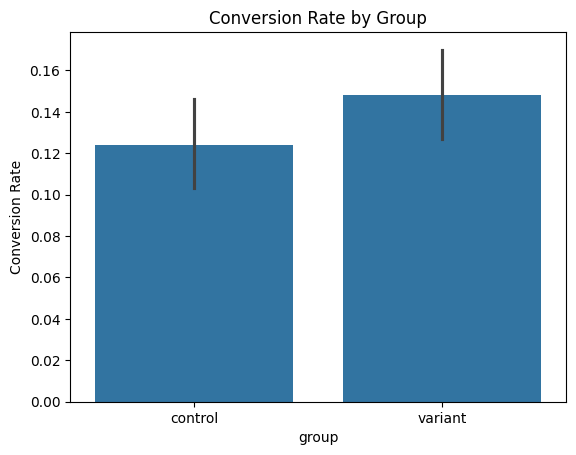

In [6]:
# Plot conversion rates
sns.barplot(data=df, x='group', y='converted', errorbar=('ci', 95))
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.show()

## 📊 Interpretation
- If the p-value is below 0.05, the difference in conversion rates is **statistically significant**.
- If not, we **fail to reject** the null hypothesis and cannot conclude a meaningful difference.

👔 Business Action: If the variant performs significantly better, consider rolling out the new version to all users. If not, investigate further or run additional tests.